In [2]:
import xarray
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import matplotlib
from matplotlib.ticker import LogFormatter,LogLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import cartopy.mpl.ticker as cticker
from matplotlib import gridspec
from matplotlib import rcParams
import cartopy.crs as ccrs
import numpy as np
import glob
import os
from tqdm.autonotebook import tqdm
from scipy import special
import math

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
def loader(path):
    paths = glob.glob(path)
    paths.sort(key=os.path.getmtime)
    file = xarray.open_mfdataset(paths, combine='by_coords')
    return file

Ue_file_old = loader('/Volumes/4YP/Data/TimeSeries/Generated/Eulerian*.nc')
Ue_file_new = loader('/Volumes/JCHD/Microplastics_Paper/Data/TimeSeries/Eulerian*.nc')
Us_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Stokes*.nc')

In [4]:
Usu_point1 = Us_file.uuss[:,246,290].values
Usv_point1 = Us_file.vuss[:,246,290].values
Us_point1 = Usu_point1 + (1j*Usv_point1) 

Ueu_point1_old = Ue_file_old.U[:,246,290].values
Uev_point1_old = Ue_file_old.V[:,246,290].values
Ue_1_old = Ueu_point1_old + (1j*Uev_point1_old)

Ueu_point1_new = Ue_file_new.U[:,246,290].values
Uev_point1_new = Ue_file_new.V[:,246,290].values
Ue_1_new = Ueu_point1_new + (1j*Uev_point1_new)

Ul_1_old = Us_point1 + Ue_1_old
Ul_1_new = Us_point1 + Ue_1_new

In [5]:
Us_point1_24 = (abs(Us_point1)).reshape(-1, 8).mean(axis=1)
Ue_1_old_24 = (abs(Ue_1_old)).reshape(-1, 8).mean(axis=1)
Ue_1_new_24 = (abs(Ue_1_new)).reshape(-1, 8).mean(axis=1)
Ul_1_old_24 = (abs(Ul_1_old)).reshape(-1, 8).mean(axis=1)
Ul_1_new_24 = (abs(Ul_1_new)).reshape(-1, 8).mean(axis=1)

In [ ]:
Usu_point2 = Us_file.uuss[:,96,120].values
Usv_point2 = Us_file.vuss[:,96,120].values
Us_point2 = Usu_point2 + (1j*Usv_point2)

Ueu_point2_old = Ue_file_old.U[:,96,120].values
Uev_point2_old = Ue_file_old.V[:,96,120].values
Ue_2_old = Ueu_point2_old + (1j*Uev_point2_old)

Ueu_point2_new = Ue_file_new.U[:,96,120].values
Uev_point2_new = Ue_file_new.V[:,96,120].values
Ue_2_new = Ueu_point2_new + (1j*Uev_point2_new)

Ul_2_old = Us_point2 + Ue_2_old
Ul_2_new = Us_point2 + Ue_2_new

In [ ]:
Us_point2_24 = (abs(Us_point2)).reshape(-1, 8).mean(axis=1)
Ue_2_old_24 = (abs(Ue_2_old)).reshape(-1, 8).mean(axis=1)
Ue_2_new_24 = (abs(Ue_2_new)).reshape(-1, 8).mean(axis=1)
Ul_2_old_24 = (abs(Ul_2_old)).reshape(-1, 8).mean(axis=1)
Ul_2_new_24 = (abs(Ul_2_new)).reshape(-1, 8).mean(axis=1)

In [ ]:
time = Us_file.uuss['time'].values
days = time[3::8]

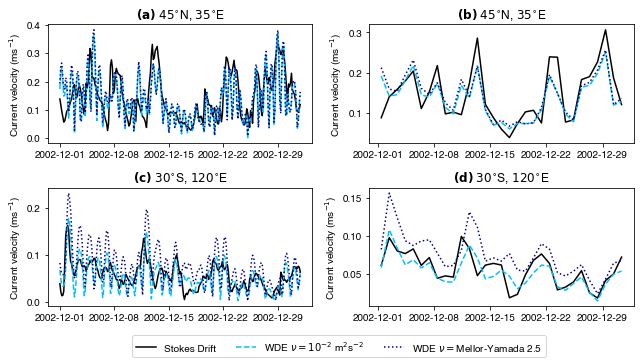

In [68]:
fig = plt.figure(figsize=(9,9))

font = {'family':'sans-serif',
        'sans-serif':['Helvetica'],
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

ax1 = plt.subplot(421)
ax1.set_title(r'$\bf{(a)}$ $45^{\circ}$N, $35^{\circ}$E')
ax1.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point1), label='Stokes Drift', color='black')
plt.plot(time,abs(Ue_1_old), '--', label=r'WDE $\nu=10^{-2}$ m$^{2}$s$^{-2}$', color='deepskyblue')
plt.plot(time,abs(Ue_1_new),':', label=r'WDE $\nu=$Mellor-Yamada 2.5', color='darkblue')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax2 = plt.subplot(422)
ax2.set_title(r'$\bf{(b)}$ $45^{\circ}$N, $35^{\circ}$E')
ax2.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point1_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ue_1_old_24), '--', label=r'$\nu=10^{-1}$', color='deepskyblue')
plt.plot(days,abs(Ue_1_new_24),':', label=r'$\nu=10^{-3}$', color='darkblue')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax3 = plt.subplot(423)
ax3.set_title(r'$\bf{(c)}$ $30^{\circ}$S, $120^{\circ}$E')
ax3.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point2), label='Stokes Drift', color='black')
plt.plot(time,abs(Ue_2_old), '--', label=r'WDE $\nu=10^{-1}$ m$^{2}$s$^{-1}$', color='deepskyblue')
plt.plot(time,abs(Ue_2_new),':', label=r'WDE $\nu=10^{-3}$ m$^{2}$s$^{-1}$', color='darkblue')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax4 = plt.subplot(424)
ax4.set_title(r'$\bf{(d)}$ $30^{\circ}$S, $120^{\circ}$E')
ax4.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point2_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ue_2_old_24), '--', label=r'$\nu=10^{-1}$', color='deepskyblue')
plt.plot(days,abs(Ue_2_new_24),':', label=r'$\nu=10^{-3}$', color='darkblue')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(7))

fig.tight_layout()

h1, l1 = ax1.get_legend_handles_labels()
ax3.legend(h1, l1,  bbox_to_anchor=(0,-.05, 2.2,-0.15), loc=9,ncol=4)

plt.savefig('/Users/jakecunningham/Documents/Summer Research/Figures/2002_Time_Series1.png', format='png', dpi=600, bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(9,9))

font = {'family':'sans-serif',
        'sans-serif':['Helvetica'],
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

ax1 = plt.subplot(421)
ax1.set_title(r'$\bf{(e)}$ $45^{\circ}$N, $35^{\circ}$E')
ax1.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point1), label='Stokes Drift', color='black')
plt.plot(time,abs(Ul_1_old), '--', label=r'Lagrangian $\nu=10^{-2}$ m$^{2}$s$^{-2}$', color='magenta')
plt.plot(time,abs(Ul_1_new),':', label=r'Lagrangian $\nu=$Mellor-Yamada 2.5', color='indigo')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax2 = plt.subplot(422)
ax2.set_title(r'$\bf{(f)}$ $45^{\circ}$N, $35^{\circ}$E')
ax2.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point1_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ul_1_old_24), '--', label=r'$\nu=10^{-2}$', color='magenta')
plt.plot(days,abs(Ul_1_new_24),':', label=r'$\nu=10^{-3}$', color='indigo')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax3 = plt.subplot(423)
ax3.set_title(r'$\bf{(g)}$ $30^{\circ}$S, $120^{\circ}$E')
ax3.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point2), label='Stokes Drift', color='black')
plt.plot(time,abs(Ul_2_old), '--', label=r'Lagrangian $\nu=10^{-2}$ m$^{2}$s$^{-1}$', color='magenta')
plt.plot(time,abs(Ul_2_new),':', label=r'Lagrangian $\nu=10^{-3}$ m$^{2}$s$^{-1}$', color='indigo')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax4 = plt.subplot(424)
ax4.set_title(r'$\bf{(h)}$ $30^{\circ}$S, $120^{\circ}$E')
ax4.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point2_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ul_2_old_24), '--', label=r'$\nu=10^{-2}$', color='magenta')
plt.plot(days,abs(Ul_2_new_24),':', label=r'$\nu=10^{-3}$', color='indigo')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(7))

fig.tight_layout()

h1, l1 = ax1.get_legend_handles_labels()
ax3.legend(h1, l1,  bbox_to_anchor=(0,-.05, 2.2,-0.15), loc=9,ncol=4)

plt.savefig('/Users/jakecunningham/Documents/Summer Research/Figures/2002_Time_Series2.png', format='png', dpi=600, bbox_inches = "tight")